In [0]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import copy

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [39]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'horse','ship', 'truck'}

background_classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog'}

# print(type(foreground_classes))

In [0]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10

for i in range(5000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      background_data.append(img)
      background_label.append(labels[j])
    else:
      img = images[j].tolist()
      foreground_data.append(img)
      foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [0]:
# print(foreground_data.size())
# print(background_data.size())
# torch.save(foreground_data,'foreground_data.pt')
# torch.save(background_data,'background_data.pt')
# torch.save(foreground_label,'foreground_label.pt')
# torch.save(background_label,'background_label.pt')
# torch.load()

In [0]:
# torch.load('foreground_data.pt')
# # print(foreground_data.size())
# # print(background_data.size())

In [0]:

# foreground_data = torch.load('foreground_data.pt')
# background_data = torch.load('background_data.pt')
# foreground_label = torch.load('foreground_label.pt')
# background_label = torch.load('background_label.pt')


In [0]:
def imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img#.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

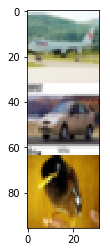

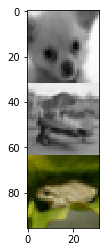

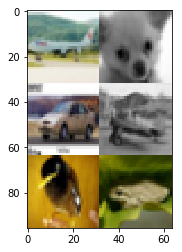

torch.Size([3, 96, 32])


In [45]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((background_data[27],background_data[3],background_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())


In [0]:
def create_mosaic_img(bg_idx,fg_idx,fg): 
  """
  bg_idx : list of indexes of background_data[] to be used as background images in mosaic
  fg_idx : index of image to be used as foreground image from foreground data
  fg : at what position/index foreground image has to be stored out of 0-8
  """
  image_list=[]
  j=0
  for i in range(9):
    if i != fg:
      image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
      j+=1
    else: 
      image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
      label = foreground_label[fg_idx]-7  # minus 7 because our fore ground classes are 7,8,9 but we have to store it as 0,1,2
  #image_list = np.concatenate(image_list ,axis=0)
  image_list = torch.stack(image_list) 
  return image_list,label

In [0]:
desired_num = 30000
mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(desired_num):
  bg_idx = np.random.randint(0,35000,8)
  fg_idx = np.random.randint(0,15000)
  fg = np.random.randint(0,9)
  fore_idx.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  mosaic_list_of_images.append(image_list)
  mosaic_label.append(label)



1


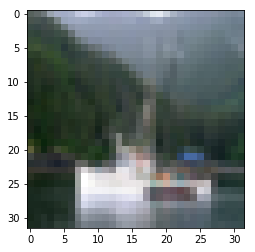

ship


In [48]:
qw=45

print(fore_idx[qw])
imshow(mosaic_list_of_images[qw][fore_idx[qw]])
# print(mosaic_list_of_images[0])
print(classes[mosaic_label[qw]+7]) # add 7 as we had subtracted 7 while saving

# imshow(mosaic_list_of_images[13][2])
# print(type(mosaic_list_of_images[1][0]))
# print(mosaic_label)

In [0]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx]

batch = 250
msd = MosaicDataset(mosaic_list_of_images,mosaic_label)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,1)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x
      
# net = Module1()
# print(net.parameters)

In [0]:
class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.module1 = Module1().double()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,3)

  def forward(self,z):  #z batch of list of 9 images
    y = torch.zeros([batch,3, 32,32], dtype=torch.float64)
    x = torch.zeros([batch,9],dtype=torch.float64)

    for i in range(9):
        x[:,i] = self.module1.forward(z[:,i])[:,0]

    x = F.softmax(x,dim=1)

    x1 = x[:,0]
    torch.mul(x1[:,None,None,None],z[:,0])

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None,None,None],z[:,i])


    y1 = self.pool(F.relu(self.conv1(y)))
    y1 = self.pool(F.relu(self.conv2(y1)))
    y1 = y1.view(-1, 16 * 5 * 5)

    y1 = F.relu(self.fc1(y1))
    y1 = F.relu(self.fc2(y1))
    y1 = F.relu(self.fc3(y1))
    y1 = self.fc4(y1)
    return y1 , x, y


In [0]:
fore_net = Module2().double()
# fore_net.load_state_dict(torch.load("model_epoch90.pt"))
# print(fore_net.parameters)

In [54]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(fore_net.parameters(), lr=0.01, momentum=0.9)
nos_epochs = 90
for epoch in range(nos_epochs):  # loop over the dataset multiple times

  running_loss = 0.0
  cnt=0

  iteration = desired_num // batch
  
  for i, data in  enumerate(train_loader):
    inputs , labels = data
    # zero the parameter gradients
    
    optimizer.zero_grad()
    
    outputs,_,_ = fore_net(inputs)
#     print(outputs)
#     print(outputs.shape,labels.shape , torch.argmax(outputs, dim=1))

    loss = criterion(outputs, labels) 
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if cnt % 40 == 39:    # print every 40 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 40))
      running_loss = 0.0
    cnt=cnt+1
#     print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt , running_loss/cnt))
#     print(running_loss)
print('Finished Training')
torch.save(fore_net.state_dict(),"model_epoch"+str(nos_epochs)+".pt")

[1,    40] loss: 1.111
[1,    80] loss: 1.099
[1,   120] loss: 1.099
[2,    40] loss: 1.099
[2,    80] loss: 1.099
[2,   120] loss: 1.099
[3,    40] loss: 1.099
[3,    80] loss: 1.099
[3,   120] loss: 1.099
[4,    40] loss: 1.099
[4,    80] loss: 1.099
[4,   120] loss: 1.099
[5,    40] loss: 1.098
[5,    80] loss: 1.098
[5,   120] loss: 1.098
[6,    40] loss: 1.098
[6,    80] loss: 1.098
[6,   120] loss: 1.098
[7,    40] loss: 1.098
[7,    80] loss: 1.098
[7,   120] loss: 1.098
[8,    40] loss: 1.097
[8,    80] loss: 1.097
[8,   120] loss: 1.097
[9,    40] loss: 1.096
[9,    80] loss: 1.095
[9,   120] loss: 1.094
[10,    40] loss: 1.093
[10,    80] loss: 1.091
[10,   120] loss: 1.089
[11,    40] loss: 1.084
[11,    80] loss: 1.084
[11,   120] loss: 1.084
[12,    40] loss: 1.081
[12,    80] loss: 1.078
[12,   120] loss: 1.078
[13,    40] loss: 1.076
[13,    80] loss: 1.076
[13,   120] loss: 1.074
[14,    40] loss: 1.074
[14,    80] loss: 1.074
[14,   120] loss: 1.069
[15,    40] loss: 1

In [0]:
def display(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

****************************************************************************************************


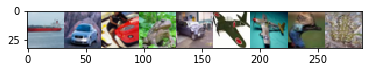

tensor([9.4838e-01, 1.5179e-02, 1.8430e-03, 5.7500e-05, 1.6102e-02, 2.3797e-04,
        7.5867e-03, 3.2347e-03, 7.3827e-03], dtype=torch.float64)


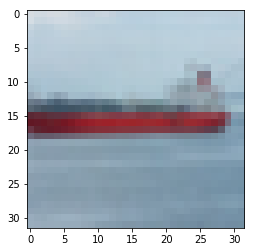

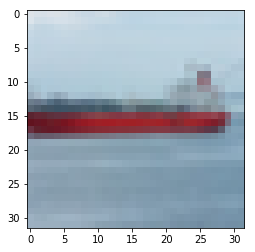

predicted ship
true ship
****************************************************************************************************


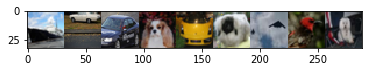

tensor([0.7834, 0.0847, 0.0596, 0.0018, 0.0014, 0.0344, 0.0022, 0.0032, 0.0292],
       dtype=torch.float64)


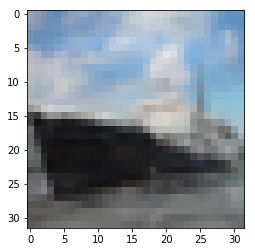

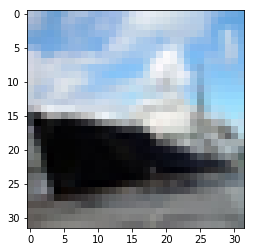

predicted ship
true ship
****************************************************************************************************


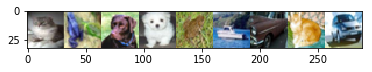

tensor([2.2511e-03, 6.6401e-04, 3.7545e-03, 4.2717e-04, 1.8634e-03, 9.3182e-01,
        2.4581e-03, 2.1089e-05, 5.6738e-02], dtype=torch.float64)


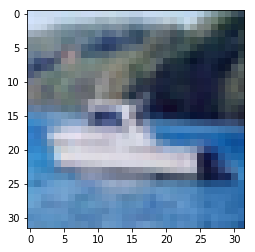

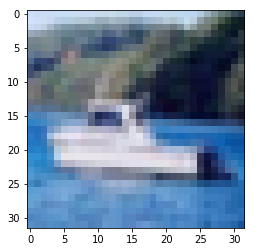

predicted ship
true ship
****************************************************************************************************


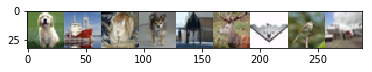

tensor([8.5423e-04, 9.3228e-01, 1.0231e-04, 6.3800e-04, 2.5232e-03, 5.1478e-03,
        3.4716e-04, 2.3810e-03, 5.5731e-02], dtype=torch.float64)


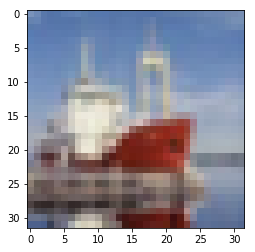

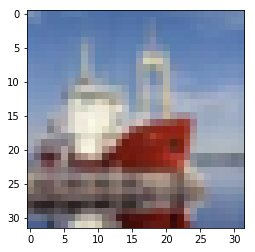

predicted ship
true ship
****************************************************************************************************


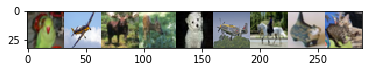

tensor([4.6853e-05, 3.5282e-06, 6.2738e-04, 3.1460e-03, 1.0702e-04, 1.0939e-03,
        9.8527e-01, 8.4340e-03, 1.2733e-03], dtype=torch.float64)


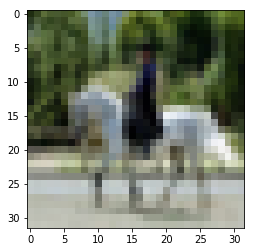

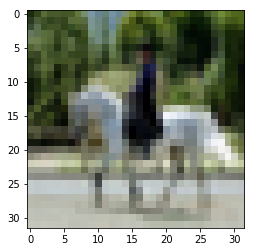

predicted horse
true horse
****************************************************************************************************


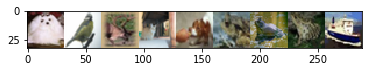

tensor([1.0995e-04, 3.6600e-06, 2.4689e-04, 4.2387e-02, 3.0069e-03, 7.3862e-04,
        3.2649e-04, 1.4431e-04, 9.5304e-01], dtype=torch.float64)


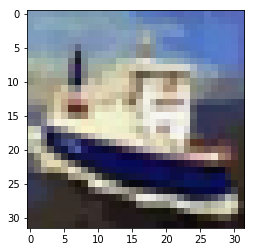

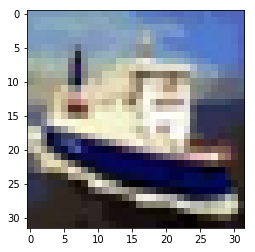

predicted ship
true ship
****************************************************************************************************


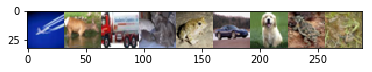

tensor([1.3193e-04, 1.2641e-03, 7.3059e-01, 2.7874e-03, 1.8523e-03, 2.5746e-01,
        1.2441e-03, 4.5053e-03, 1.6346e-04], dtype=torch.float64)


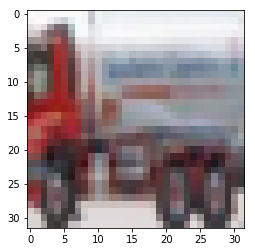

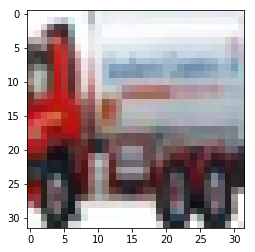

predicted truck
true truck
****************************************************************************************************


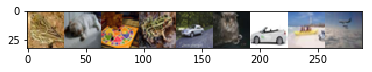

tensor([2.1762e-04, 3.6484e-02, 3.2434e-03, 1.1516e-02, 2.3544e-02, 1.8704e-03,
        6.2377e-02, 8.2369e-01, 3.7060e-02], dtype=torch.float64)


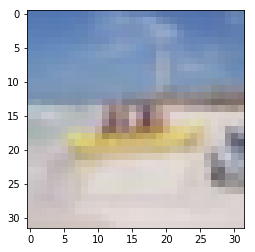

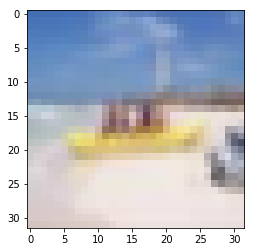

predicted ship
true ship
****************************************************************************************************


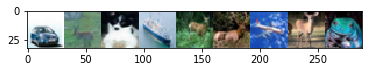

tensor([0.0450, 0.0275, 0.0024, 0.9000, 0.0041, 0.0122, 0.0028, 0.0043, 0.0018],
       dtype=torch.float64)


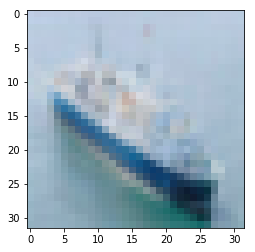

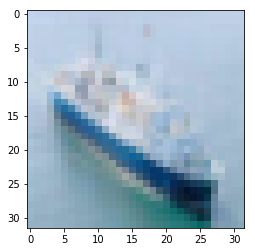

predicted ship
true ship
****************************************************************************************************


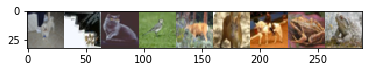

tensor([0.0037, 0.0048, 0.0211, 0.0033, 0.0219, 0.0103, 0.7286, 0.0470, 0.1592],
       dtype=torch.float64)


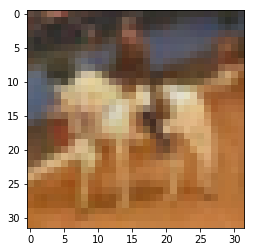

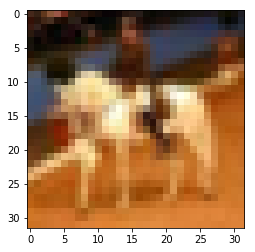

predicted horse
true horse
****************************************************************************************************


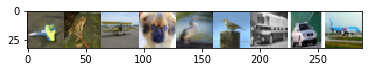

tensor([4.8838e-03, 5.3707e-04, 6.2573e-02, 8.7532e-03, 2.0690e-03, 4.9334e-03,
        8.7324e-01, 3.8611e-02, 4.4009e-03], dtype=torch.float64)


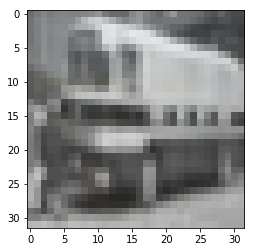

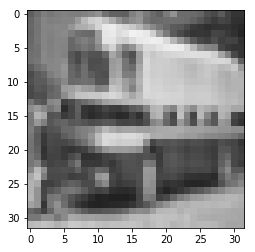

predicted truck
true truck
****************************************************************************************************


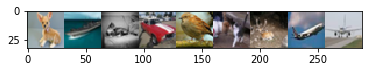

tensor([0.0037, 0.8904, 0.0200, 0.0375, 0.0024, 0.0194, 0.0042, 0.0067, 0.0157],
       dtype=torch.float64)


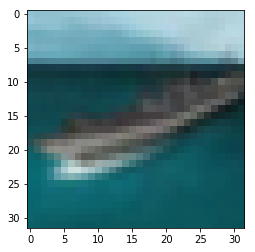

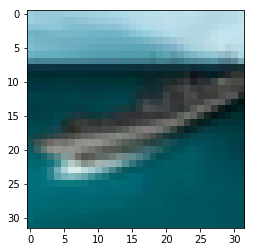

predicted ship
true ship
****************************************************************************************************


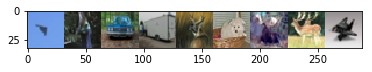

tensor([5.8424e-05, 1.4513e-02, 9.4730e-02, 6.8350e-01, 1.7487e-03, 1.0832e-02,
        1.9159e-01, 9.5831e-05, 2.9349e-03], dtype=torch.float64)


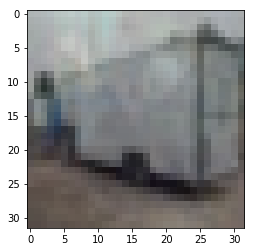

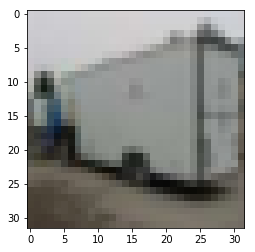

predicted truck
true truck
****************************************************************************************************


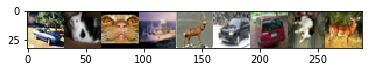

tensor([1.2523e-02, 1.5703e-04, 1.7303e-05, 9.6490e-01, 4.1364e-03, 1.3819e-02,
        4.1834e-03, 3.8881e-05, 2.2620e-04], dtype=torch.float64)


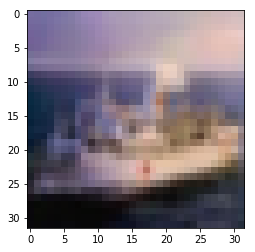

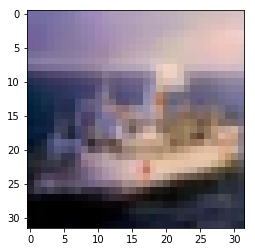

predicted ship
true ship
****************************************************************************************************


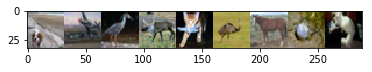

tensor([8.5987e-03, 4.7884e-03, 6.1021e-05, 2.2759e-02, 1.8182e-04, 3.7751e-05,
        9.6325e-01, 2.5790e-04, 6.6462e-05], dtype=torch.float64)


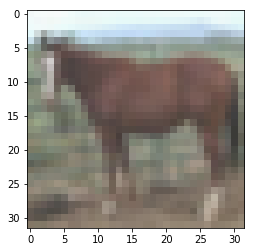

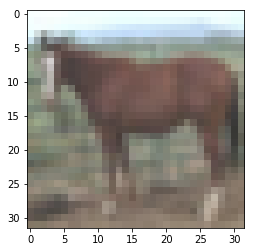

predicted horse
true horse
****************************************************************************************************


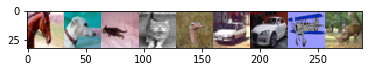

tensor([0.5073, 0.1499, 0.1026, 0.1971, 0.0048, 0.0317, 0.0012, 0.0006, 0.0049],
       dtype=torch.float64)


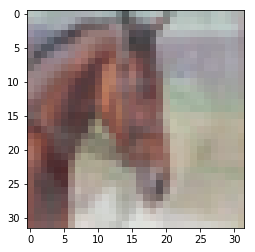

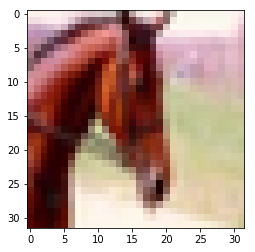

predicted horse
true horse
****************************************************************************************************


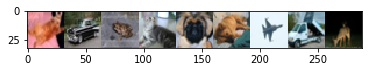

tensor([4.3318e-06, 1.2372e-04, 2.1509e-04, 3.4003e-05, 4.5513e-06, 8.8112e-05,
        1.7689e-05, 9.9949e-01, 2.4521e-05], dtype=torch.float64)


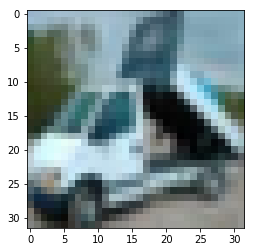

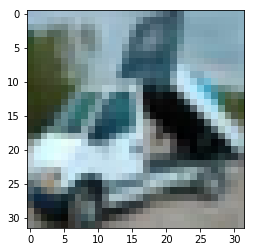

predicted truck
true truck
****************************************************************************************************


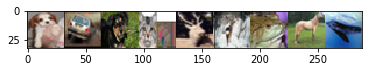

tensor([1.1398e-02, 1.9299e-02, 1.2812e-02, 2.2465e-02, 2.4977e-04, 3.1308e-03,
        1.4236e-03, 9.2755e-01, 1.6763e-03], dtype=torch.float64)


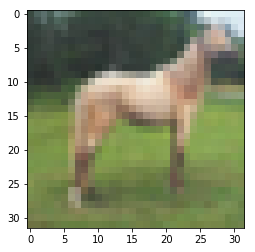

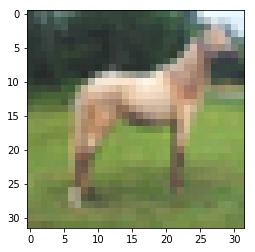

predicted horse
true horse
****************************************************************************************************


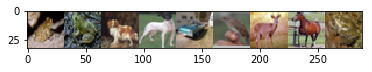

tensor([3.2521e-06, 7.9234e-05, 1.5086e-04, 3.2016e-04, 3.4778e-05, 7.8311e-05,
        4.5498e-05, 9.9924e-01, 4.9969e-05], dtype=torch.float64)


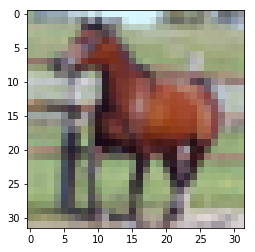

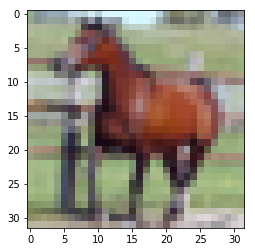

predicted horse
true horse
****************************************************************************************************


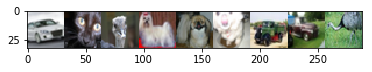

tensor([0.0072, 0.0132, 0.0023, 0.0019, 0.0042, 0.0123, 0.9434, 0.0089, 0.0067],
       dtype=torch.float64)


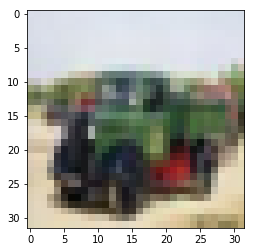

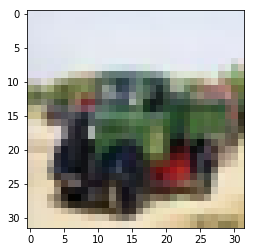

predicted truck
true truck
****************************************************************************************************


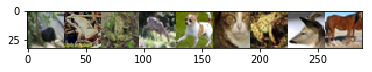

tensor([4.5969e-04, 2.2039e-04, 1.7739e-03, 1.2956e-03, 2.5610e-04, 1.6709e-04,
        1.6778e-04, 4.5583e-04, 9.9520e-01], dtype=torch.float64)


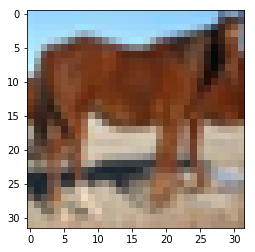

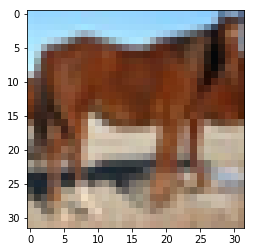

predicted horse
true horse
****************************************************************************************************


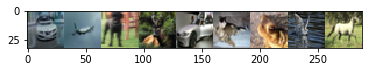

tensor([2.1431e-02, 6.3515e-03, 1.8410e-02, 1.4849e-04, 1.8522e-04, 9.5074e-04,
        2.4769e-03, 4.3756e-03, 9.4567e-01], dtype=torch.float64)


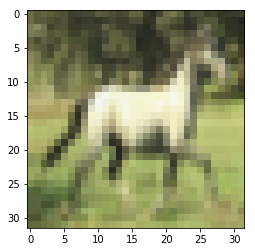

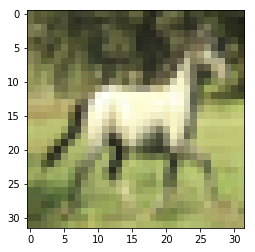

predicted horse
true horse
****************************************************************************************************


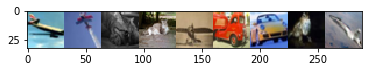

tensor([1.1534e-02, 1.0601e-04, 6.3381e-04, 9.6536e-04, 1.0667e-03, 9.6410e-01,
        2.0052e-02, 4.1307e-04, 1.1332e-03], dtype=torch.float64)


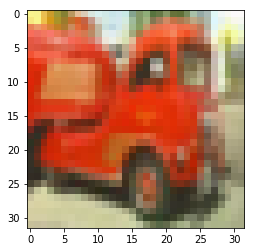

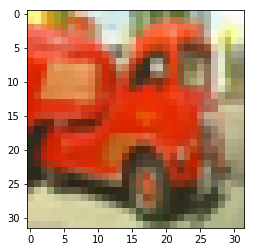

predicted truck
true truck
****************************************************************************************************


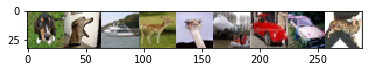

tensor([1.9811e-03, 8.5659e-03, 8.4265e-01, 6.7104e-04, 8.7633e-03, 9.8526e-02,
        3.0311e-02, 3.6669e-03, 4.8678e-03], dtype=torch.float64)


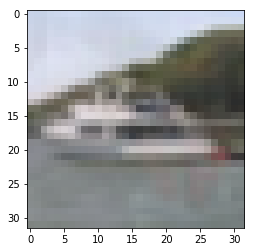

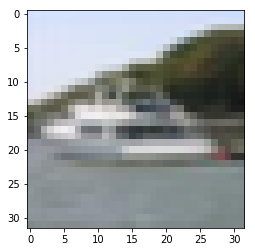

predicted ship
true ship
****************************************************************************************************


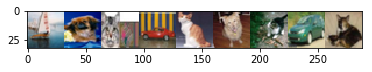

tensor([0.8411, 0.0081, 0.0413, 0.0055, 0.0012, 0.0025, 0.0490, 0.0102, 0.0411],
       dtype=torch.float64)


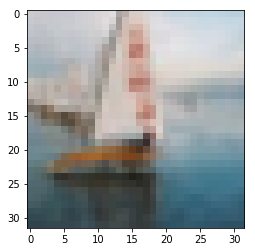

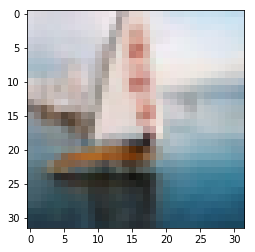

predicted ship
true ship
****************************************************************************************************


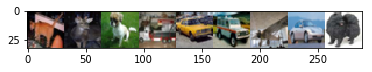

tensor([2.9374e-03, 6.0533e-04, 4.5353e-04, 7.7753e-01, 6.3356e-03, 4.2666e-02,
        2.9383e-02, 1.3946e-01, 6.3197e-04], dtype=torch.float64)


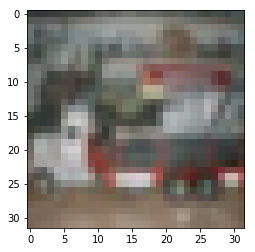

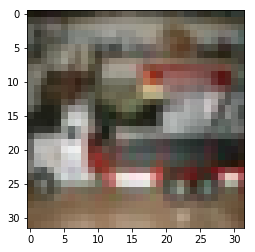

predicted truck
true truck
****************************************************************************************************


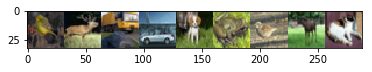

tensor([0.0057, 0.0164, 0.6679, 0.2374, 0.0135, 0.0073, 0.0289, 0.0209, 0.0021],
       dtype=torch.float64)


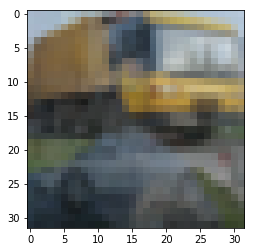

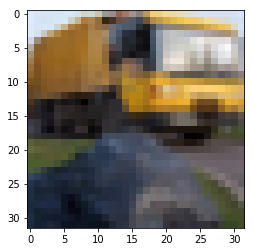

predicted truck
true truck
****************************************************************************************************


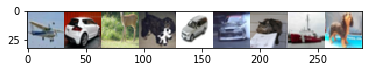

tensor([2.2195e-04, 1.0666e-06, 7.6126e-05, 2.9337e-03, 1.6766e-05, 5.9167e-03,
        1.0109e-04, 9.9056e-01, 1.7463e-04], dtype=torch.float64)


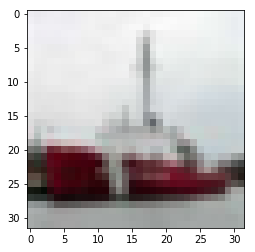

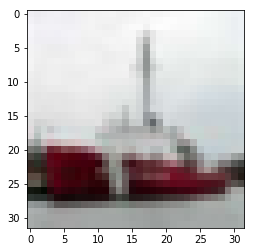

predicted ship
true ship
****************************************************************************************************


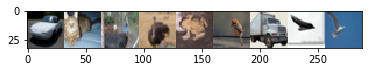

tensor([2.9085e-03, 1.9390e-04, 2.9470e-02, 5.1510e-03, 2.3432e-03, 4.4667e-03,
        9.5275e-01, 1.0167e-04, 2.6169e-03], dtype=torch.float64)


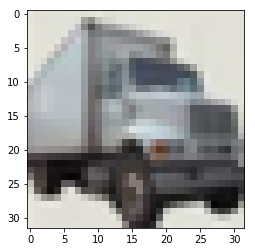

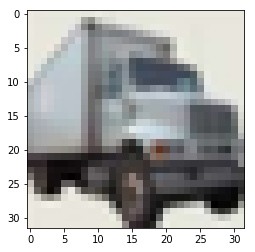

predicted truck
true truck
****************************************************************************************************


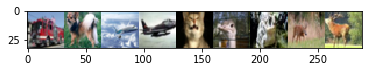

tensor([9.6543e-01, 1.8459e-02, 4.7298e-03, 4.3044e-03, 3.0728e-05, 4.3839e-03,
        2.1237e-04, 9.6962e-04, 1.4796e-03], dtype=torch.float64)


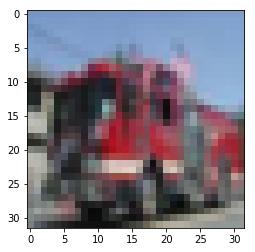

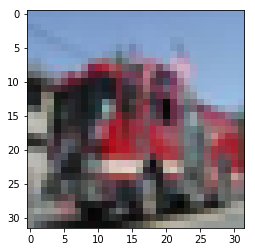

predicted truck
true truck
****************************************************************************************************


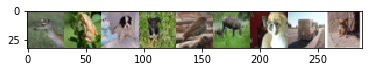

tensor([8.5447e-04, 3.3736e-04, 8.7632e-05, 1.7276e-03, 9.5113e-03, 1.1810e-03,
        2.9912e-06, 9.8266e-01, 3.6333e-03], dtype=torch.float64)


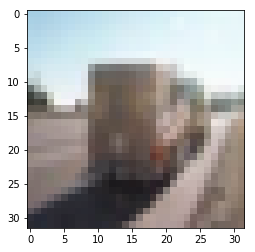

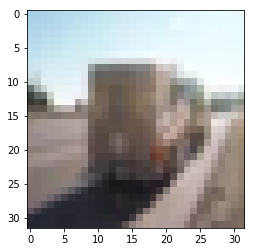

predicted truck
true truck
****************************************************************************************************


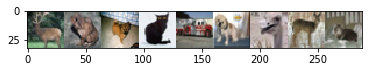

tensor([1.3807e-04, 3.4464e-05, 1.1164e-04, 1.6193e-04, 9.9782e-01, 1.2415e-03,
        2.4044e-05, 7.5419e-05, 3.9416e-04], dtype=torch.float64)


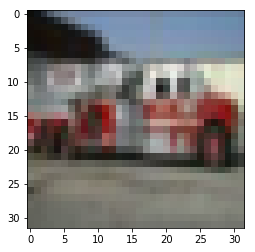

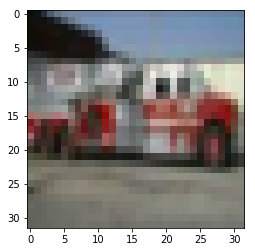

predicted truck
true truck
****************************************************************************************************


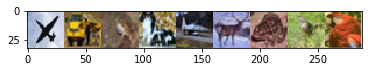

tensor([5.5389e-06, 7.6912e-01, 2.6510e-02, 1.9954e-02, 4.5370e-02, 6.9718e-02,
        4.9480e-02, 4.4099e-03, 1.5431e-02], dtype=torch.float64)


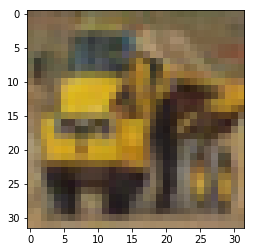

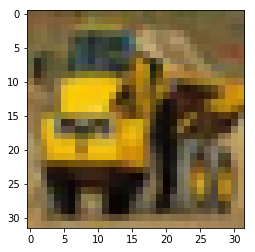

predicted truck
true truck
****************************************************************************************************


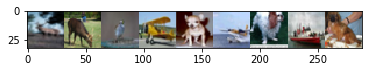

tensor([1.9518e-03, 6.0605e-04, 7.4765e-04, 4.4884e-03, 3.8547e-06, 5.3679e-04,
        7.3669e-04, 9.9088e-01, 5.2280e-05], dtype=torch.float64)


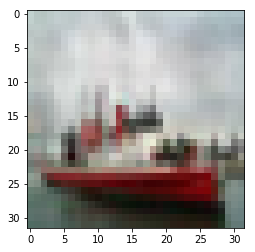

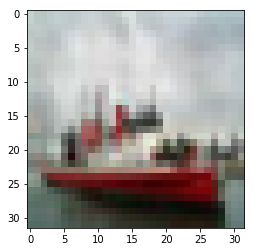

predicted ship
true ship
****************************************************************************************************


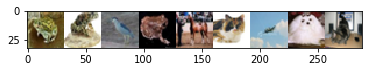

tensor([7.8458e-06, 3.3144e-06, 7.9793e-05, 4.7957e-06, 9.9989e-01, 6.4007e-07,
        3.3636e-06, 4.0366e-06, 4.9259e-06], dtype=torch.float64)


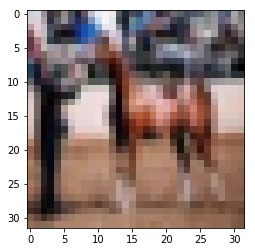

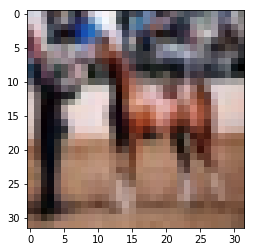

predicted horse
true horse
****************************************************************************************************


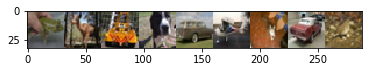

tensor([0.0382, 0.0101, 0.0009, 0.0242, 0.5444, 0.2812, 0.0022, 0.0980, 0.0009],
       dtype=torch.float64)


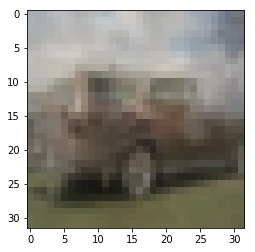

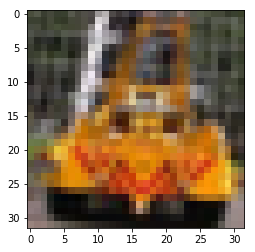

predicted truck
true truck
****************************************************************************************************


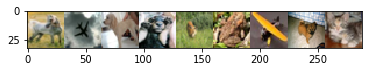

tensor([0.2082, 0.0865, 0.2167, 0.1549, 0.0573, 0.0084, 0.1769, 0.0757, 0.0153],
       dtype=torch.float64)


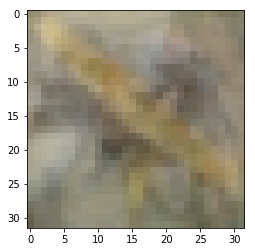

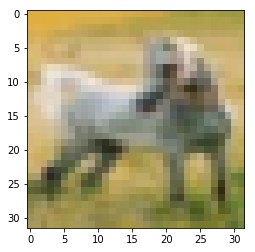

predicted horse
true horse
****************************************************************************************************


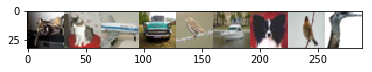

tensor([0.3333, 0.0238, 0.3100, 0.2132, 0.0946, 0.0090, 0.0025, 0.0014, 0.0123],
       dtype=torch.float64)


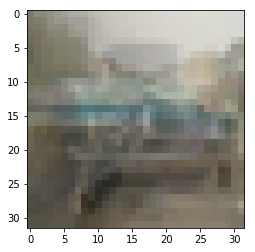

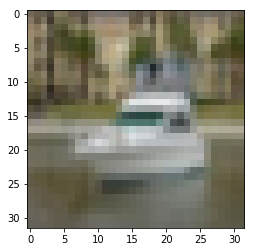

predicted truck
true ship
****************************************************************************************************


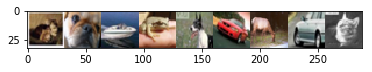

tensor([7.1576e-03, 1.0906e-04, 9.6919e-01, 3.5326e-04, 1.8334e-03, 6.7746e-03,
        8.3404e-03, 4.3501e-03, 1.8962e-03], dtype=torch.float64)


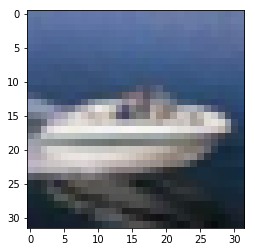

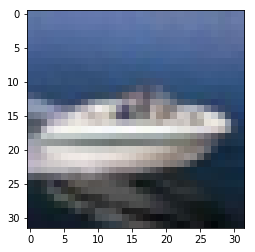

predicted ship
true ship
****************************************************************************************************


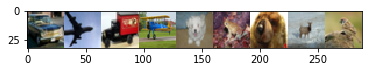

tensor([5.1445e-03, 2.1617e-04, 9.8066e-01, 5.8159e-03, 5.7110e-03, 2.1106e-04,
        3.6125e-04, 1.7133e-03, 1.7065e-04], dtype=torch.float64)


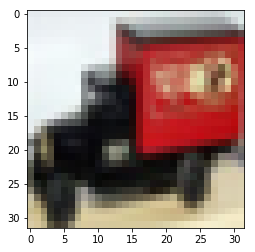

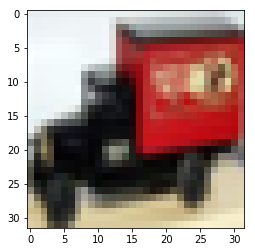

predicted truck
true truck
****************************************************************************************************


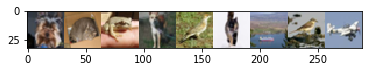

tensor([9.3377e-03, 1.2749e-03, 9.3487e-04, 6.7416e-03, 1.5496e-03, 4.8503e-04,
        9.2968e-01, 2.7553e-03, 4.7241e-02], dtype=torch.float64)


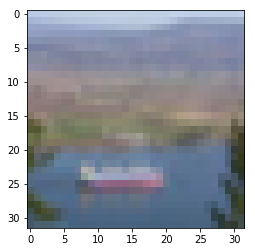

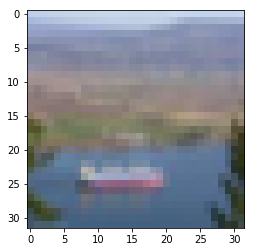

predicted ship
true ship
****************************************************************************************************


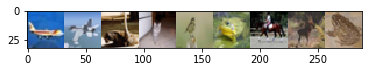

tensor([4.2766e-04, 1.4346e-03, 1.9508e-02, 4.6780e-04, 5.2373e-04, 4.5447e-04,
        9.7426e-01, 2.4287e-03, 4.9129e-04], dtype=torch.float64)


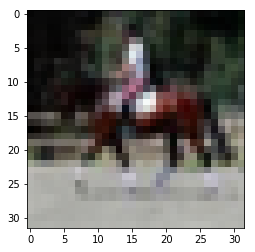

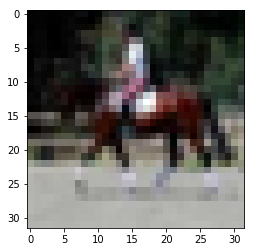

predicted horse
true horse
****************************************************************************************************


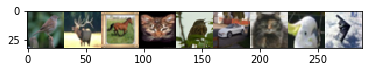

tensor([1.8727e-02, 1.4948e-02, 8.0780e-01, 3.8295e-02, 5.9493e-02, 2.3337e-02,
        3.0651e-02, 6.4376e-03, 3.1473e-04], dtype=torch.float64)


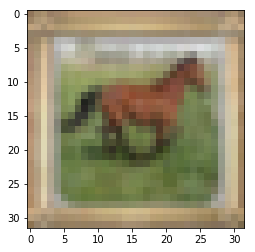

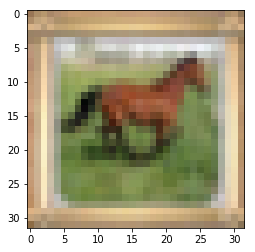

predicted horse
true horse
****************************************************************************************************


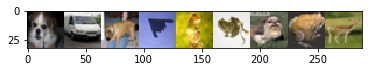

tensor([2.1359e-02, 8.1265e-01, 7.2001e-03, 8.7159e-04, 4.1612e-05, 3.7384e-02,
        9.0480e-02, 2.7873e-02, 2.1410e-03], dtype=torch.float64)


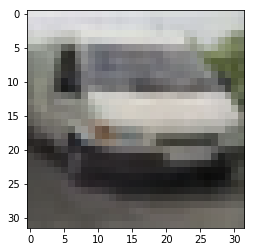

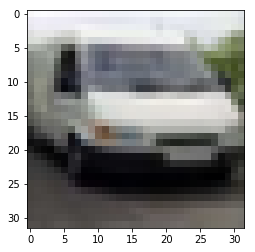

predicted truck
true truck
****************************************************************************************************


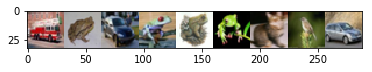

tensor([9.8149e-01, 5.1078e-04, 9.9870e-03, 1.5553e-03, 2.6285e-04, 8.3499e-04,
        2.2249e-03, 1.1343e-03, 1.9999e-03], dtype=torch.float64)


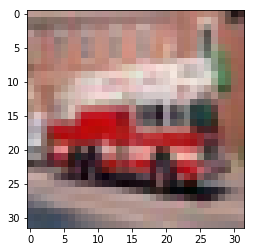

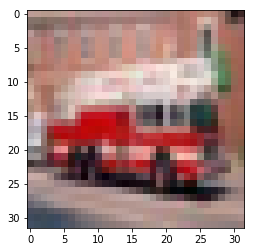

predicted truck
true truck
****************************************************************************************************


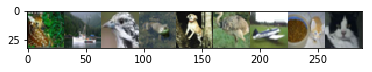

tensor([0.0017, 0.7072, 0.0084, 0.1376, 0.0119, 0.0329, 0.0516, 0.0466, 0.0020],
       dtype=torch.float64)


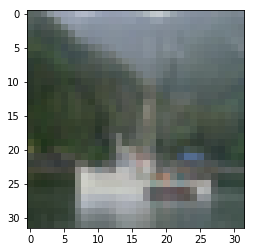

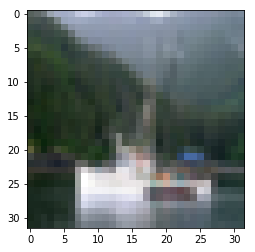

predicted ship
true ship
****************************************************************************************************


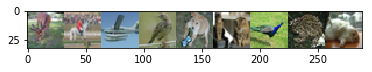

tensor([9.9617e-02, 5.7515e-01, 5.3123e-02, 6.5570e-03, 1.2317e-01, 4.6800e-03,
        1.9356e-04, 1.3250e-02, 1.2425e-01], dtype=torch.float64)


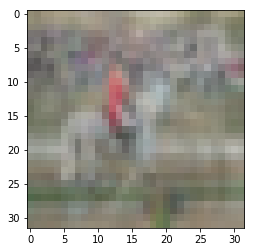

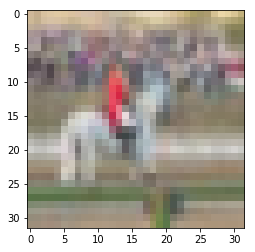

predicted horse
true horse
****************************************************************************************************


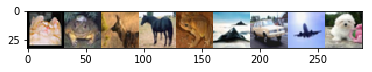

tensor([3.7176e-05, 1.7611e-03, 4.3708e-04, 9.8747e-01, 3.2189e-04, 1.1106e-03,
        7.5534e-03, 1.2594e-03, 5.0391e-05], dtype=torch.float64)


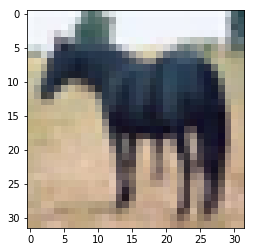

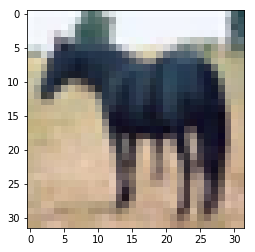

predicted horse
true horse
****************************************************************************************************


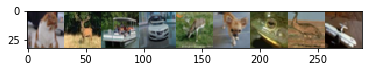

tensor([0.0096, 0.0093, 0.1599, 0.4965, 0.0400, 0.1386, 0.0159, 0.0571, 0.0730],
       dtype=torch.float64)


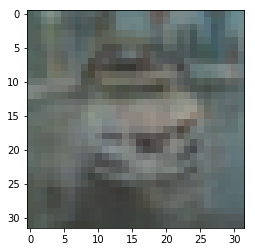

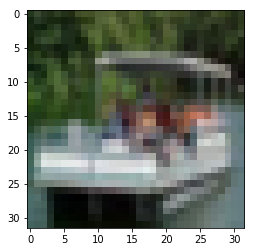

predicted ship
true ship
****************************************************************************************************


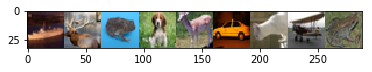

tensor([7.1472e-01, 2.4090e-03, 1.5174e-03, 2.0595e-04, 1.1055e-01, 2.9644e-03,
        9.1133e-02, 7.3791e-02, 2.7131e-03], dtype=torch.float64)


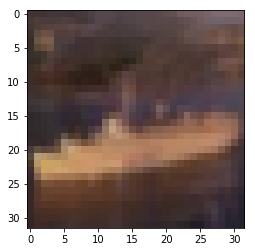

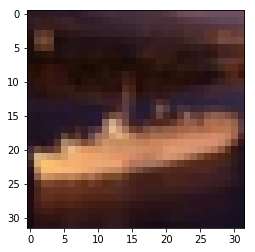

predicted ship
true ship
Accuracy of the network on the 30000 train images: 98 %
total correct 29402
total test set images 30000


In [56]:
correct = 0
total = 0
count = 0
flag = 1
train_loader1 = DataLoader( msd,batch_size= batch ,shuffle=False)
with torch.no_grad():
  for data in train_loader1:
    inputs, labels = data

    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    if flag==1 :
      for j in range (50):
        print("*"*100)
        img1 = torch.cat((inputs[j][0], inputs[j][1], inputs[j][2], inputs[j][3], inputs[j][4], inputs[j][5], inputs[j][6], inputs[j][7], inputs[j][8]) , 2)
        display(img1)

        print(alphas[j])

        img2 = avg_images[j]
        display(img2)

        img3 = inputs[j][fore_idx[j]]
        display(img3)

        print("predicted", classes[predicted[j]+7])
        print("true", classes[labels[j]+7])

      flag =0

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 30000 train images: %d %%' % (
    100 * correct / total))
print("total correct", correct)
print("total test set images", total)

In [0]:
test_images =[]        #list of mosaic images, each mosaic image is saved as laist of 9 images
fore_idx_test =[]                   #list of indexes at which foreground image is present in a mosaic image                
test_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(10000):
  bg_idx = np.random.randint(0,35000,8)
  fg_idx = np.random.randint(0,15000)
  fg = np.random.randint(0,9)
  fore_idx_test.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  test_images.append(image_list)
  test_label.append(label)

In [0]:
test_data = MosaicDataset(test_images,test_label)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

2


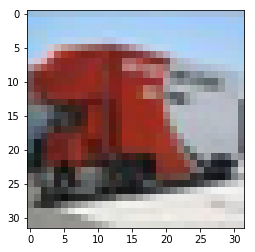

truck


In [59]:
print(fore_idx_test[0])
imshow(test_images[0][fore_idx_test[0]])
print(classes[test_label[0]+7])

****************************************************************************************************


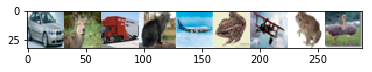

tensor([6.0360e-03, 3.8206e-04, 9.7297e-01, 3.0985e-03, 3.2976e-04, 4.9127e-05,
        1.9424e-04, 1.5793e-06, 1.6937e-02], dtype=torch.float64)


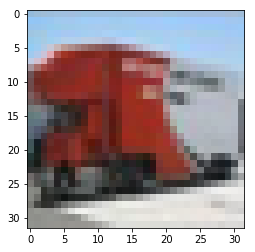

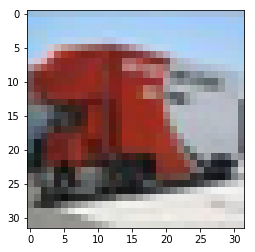

predicted truck
true truck
****************************************************************************************************


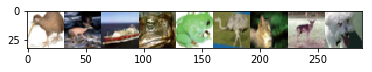

tensor([0.0102, 0.0446, 0.6424, 0.1034, 0.0014, 0.0119, 0.0007, 0.0564, 0.1289],
       dtype=torch.float64)


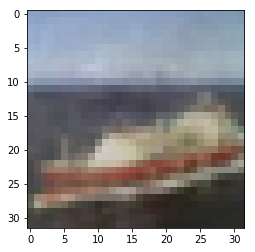

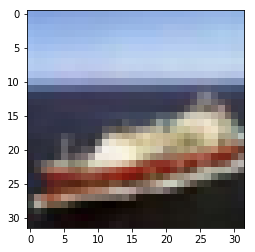

predicted ship
true ship
****************************************************************************************************


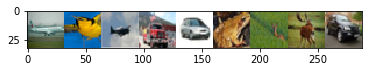

tensor([5.2479e-04, 1.2904e-05, 2.1199e-04, 9.9864e-01, 3.5902e-05, 1.1428e-06,
        3.5899e-05, 1.1648e-04, 4.2092e-04], dtype=torch.float64)


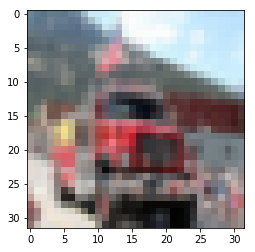

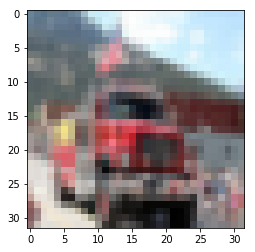

predicted truck
true truck
****************************************************************************************************


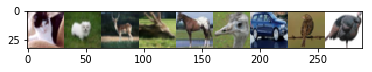

tensor([5.9109e-06, 3.5720e-04, 6.0042e-03, 2.3463e-03, 9.8678e-01, 9.7117e-04,
        2.0315e-03, 3.5647e-04, 1.1516e-03], dtype=torch.float64)


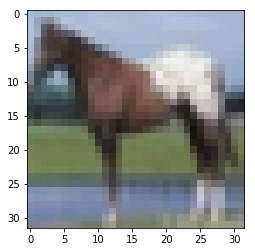

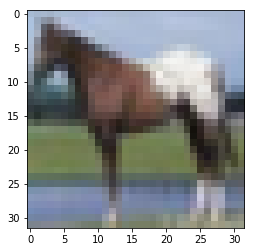

predicted horse
true horse
****************************************************************************************************


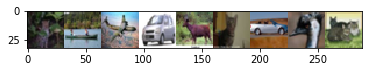

tensor([2.0869e-03, 8.5197e-01, 4.1278e-02, 4.3449e-04, 6.3677e-04, 1.6794e-03,
        9.9452e-02, 2.7742e-04, 2.1826e-03], dtype=torch.float64)


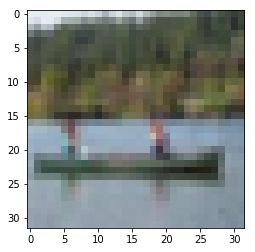

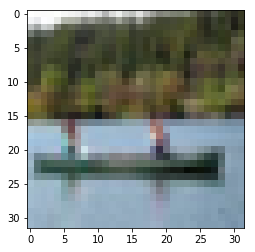

predicted ship
true ship
****************************************************************************************************


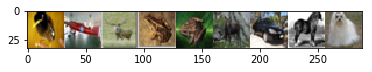

tensor([1.6256e-05, 3.5821e-03, 1.9953e-04, 4.3825e-05, 2.9792e-04, 5.2981e-03,
        4.4193e-04, 9.8997e-01, 1.5094e-04], dtype=torch.float64)


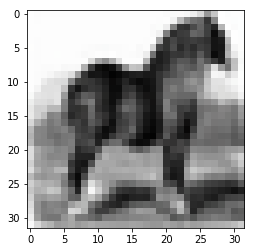

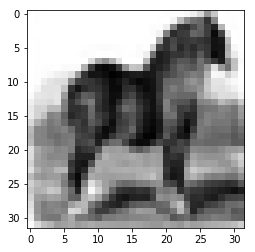

predicted horse
true horse
****************************************************************************************************


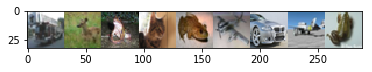

tensor([0.5613, 0.0010, 0.0472, 0.0115, 0.0038, 0.0056, 0.2214, 0.1404, 0.0077],
       dtype=torch.float64)


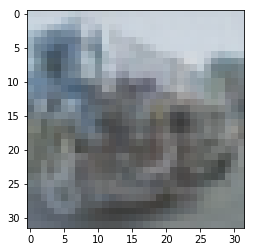

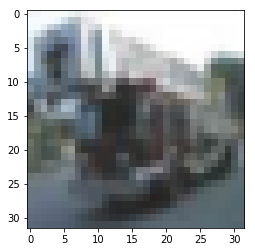

predicted ship
true truck
****************************************************************************************************


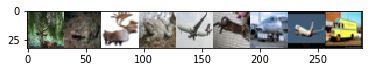

tensor([4.2907e-04, 1.7745e-03, 1.3154e-03, 9.7317e-03, 1.1463e-05, 4.8562e-03,
        1.5411e-03, 1.2055e-02, 9.6829e-01], dtype=torch.float64)


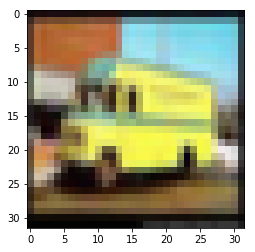

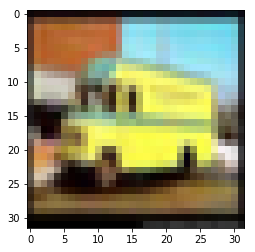

predicted truck
true truck
****************************************************************************************************


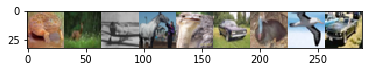

tensor([0.0025, 0.0158, 0.6569, 0.2721, 0.0079, 0.0144, 0.0265, 0.0022, 0.0016],
       dtype=torch.float64)


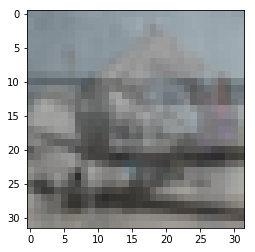

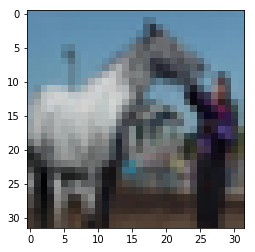

predicted ship
true horse
****************************************************************************************************


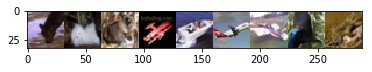

tensor([7.5544e-04, 8.0287e-04, 5.8056e-05, 4.4278e-05, 9.8977e-01, 2.0802e-04,
        7.2617e-03, 1.0975e-03, 6.7124e-06], dtype=torch.float64)


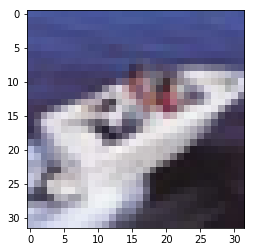

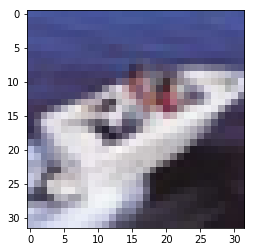

predicted ship
true ship
****************************************************************************************************


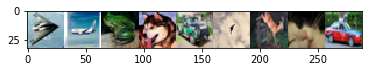

tensor([1.3676e-03, 1.0175e-02, 7.6080e-03, 6.4657e-04, 9.6123e-01, 6.5309e-03,
        3.8336e-03, 1.7381e-03, 6.8719e-03], dtype=torch.float64)


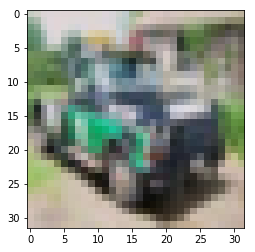

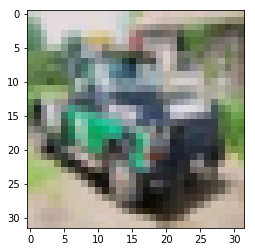

predicted truck
true truck
****************************************************************************************************


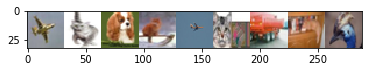

tensor([0.0070, 0.0025, 0.0015, 0.0449, 0.0320, 0.0201, 0.8841, 0.0030, 0.0048],
       dtype=torch.float64)


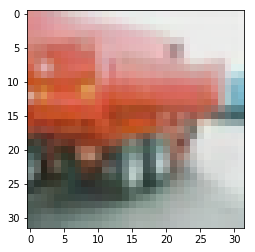

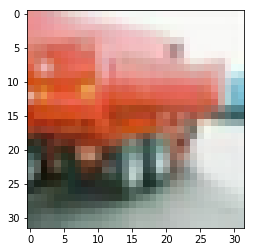

predicted truck
true truck
****************************************************************************************************


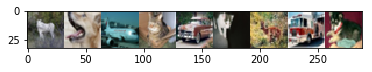

tensor([5.9472e-04, 1.2115e-05, 1.5760e-04, 4.1478e-06, 5.5243e-05, 4.4545e-06,
        2.7105e-06, 9.9917e-01, 2.8681e-07], dtype=torch.float64)


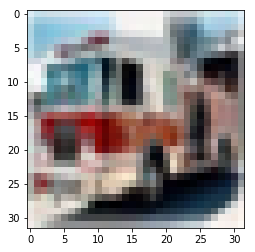

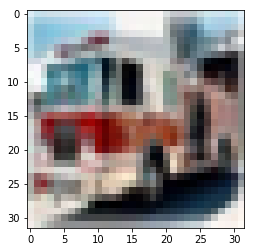

predicted truck
true truck
****************************************************************************************************


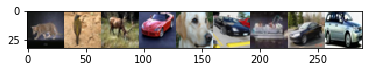

tensor([0.0501, 0.0015, 0.0523, 0.0463, 0.0232, 0.0022, 0.8005, 0.0086, 0.0153],
       dtype=torch.float64)


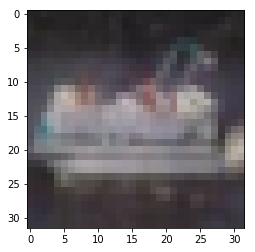

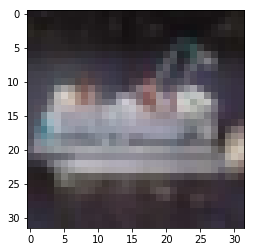

predicted ship
true ship
****************************************************************************************************


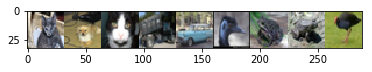

tensor([7.9576e-03, 2.6025e-03, 1.8462e-04, 2.4740e-02, 2.8686e-01, 1.5356e-02,
        7.6327e-02, 5.8034e-01, 5.6311e-03], dtype=torch.float64)


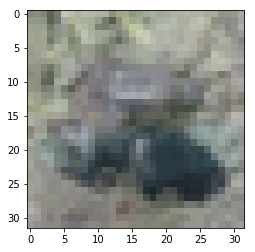

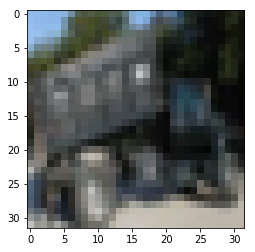

predicted truck
true truck
****************************************************************************************************


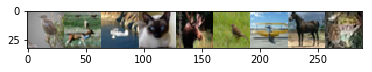

tensor([1.7100e-03, 7.7935e-03, 3.1438e-02, 1.3008e-04, 1.4460e-03, 2.9809e-05,
        3.8820e-02, 9.1859e-01, 3.8180e-05], dtype=torch.float64)


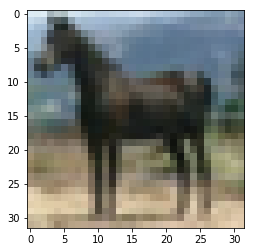

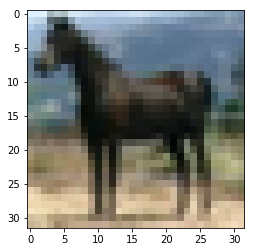

predicted horse
true horse
****************************************************************************************************


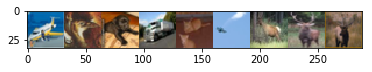

tensor([3.4490e-03, 2.5116e-03, 2.1210e-04, 9.5751e-01, 1.2386e-02, 3.9113e-04,
        3.9544e-03, 1.6560e-02, 3.0213e-03], dtype=torch.float64)


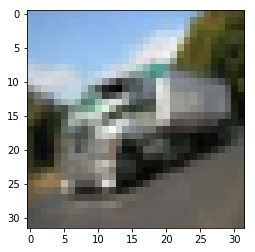

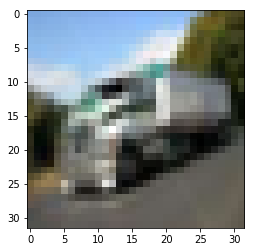

predicted truck
true truck
****************************************************************************************************


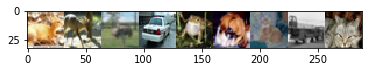

tensor([1.2793e-04, 3.1183e-03, 3.6109e-02, 7.5765e-01, 1.3896e-03, 1.7770e-02,
        7.1226e-03, 1.7649e-01, 2.2114e-04], dtype=torch.float64)


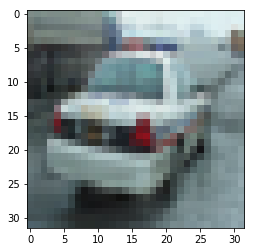

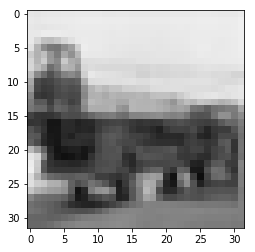

predicted truck
true truck
****************************************************************************************************


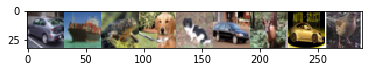

tensor([0.0592, 0.6008, 0.0023, 0.0350, 0.1177, 0.0920, 0.0789, 0.0018, 0.0123],
       dtype=torch.float64)


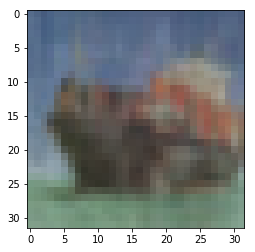

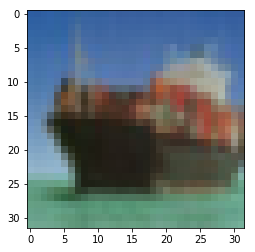

predicted horse
true ship
****************************************************************************************************


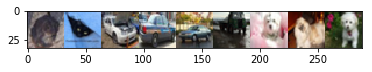

tensor([1.2718e-02, 5.1543e-03, 9.9011e-03, 1.3021e-02, 4.7444e-02, 8.9088e-01,
        1.3219e-02, 2.2451e-04, 7.4400e-03], dtype=torch.float64)


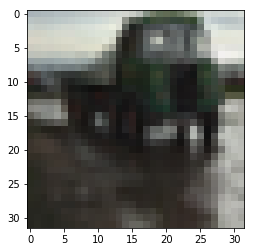

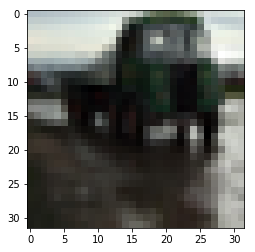

predicted truck
true truck
****************************************************************************************************


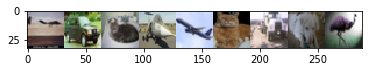

tensor([9.4663e-02, 3.3206e-04, 2.1176e-03, 6.7358e-02, 2.4936e-04, 2.0179e-04,
        8.2297e-01, 1.3325e-03, 1.0778e-02], dtype=torch.float64)


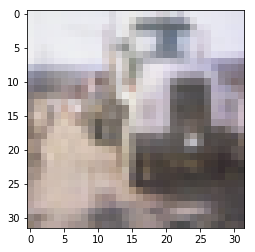

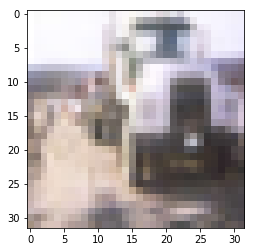

predicted truck
true truck
****************************************************************************************************


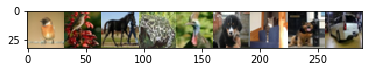

tensor([2.0443e-05, 2.4384e-04, 9.9654e-01, 1.2970e-04, 1.7711e-05, 4.2690e-04,
        4.1774e-05, 8.7539e-06, 2.5719e-03], dtype=torch.float64)


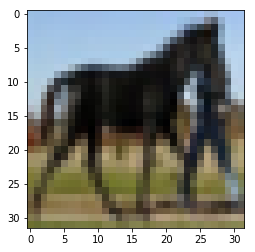

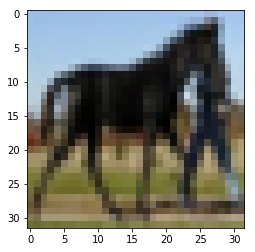

predicted horse
true horse
****************************************************************************************************


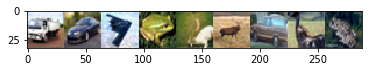

tensor([9.9404e-01, 7.6595e-05, 4.1718e-07, 1.6228e-06, 4.3745e-06, 1.8581e-04,
        1.7744e-03, 3.4821e-03, 4.3849e-04], dtype=torch.float64)


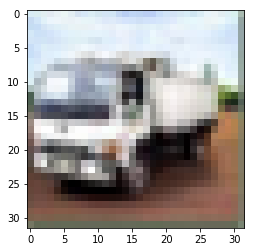

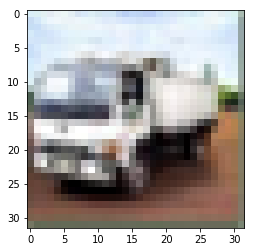

predicted truck
true truck
****************************************************************************************************


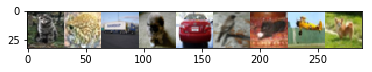

tensor([8.6807e-03, 3.5780e-04, 9.6416e-01, 2.0026e-04, 1.3205e-02, 4.2754e-03,
        1.0603e-03, 7.8759e-03, 1.8232e-04], dtype=torch.float64)


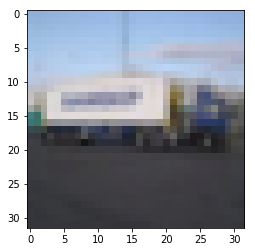

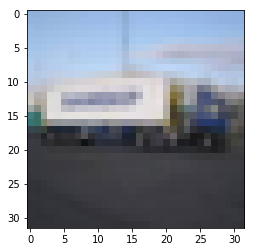

predicted truck
true truck
****************************************************************************************************


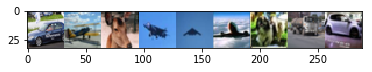

tensor([3.0942e-02, 3.6944e-02, 4.2053e-03, 1.6188e-04, 1.3034e-03, 1.8544e-02,
        1.3954e-02, 8.9229e-01, 1.6498e-03], dtype=torch.float64)


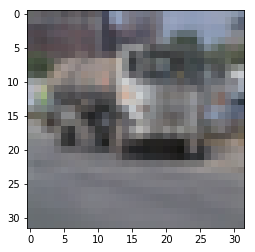

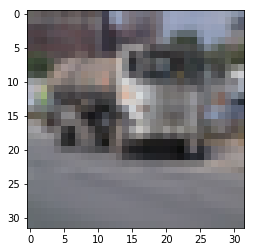

predicted truck
true truck
****************************************************************************************************


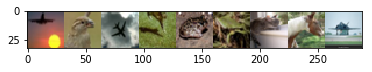

tensor([5.3851e-04, 2.7826e-03, 3.3425e-03, 5.8708e-04, 1.6116e-03, 7.2834e-04,
        7.5573e-03, 9.7126e-01, 1.1594e-02], dtype=torch.float64)


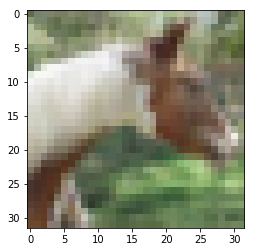

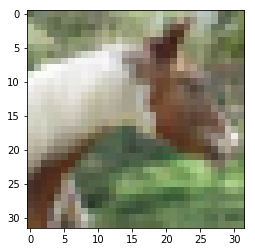

predicted horse
true horse
****************************************************************************************************


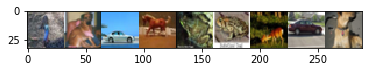

tensor([2.3467e-01, 1.1560e-02, 4.5199e-02, 1.4759e-01, 2.9440e-03, 4.0680e-01,
        3.9122e-03, 1.4725e-01, 6.9490e-05], dtype=torch.float64)


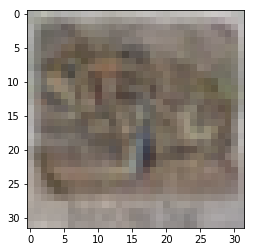

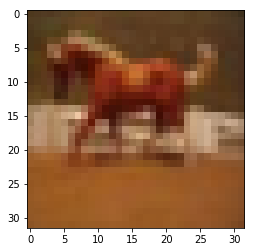

predicted ship
true horse
****************************************************************************************************


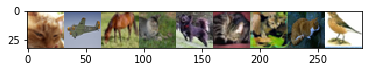

tensor([1.1981e-02, 2.1675e-02, 5.8641e-01, 6.0932e-03, 8.8918e-02, 2.1005e-02,
        2.4519e-04, 2.6357e-01, 9.9364e-05], dtype=torch.float64)


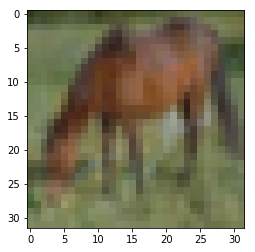

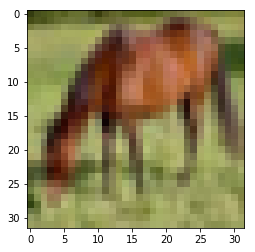

predicted horse
true horse
****************************************************************************************************


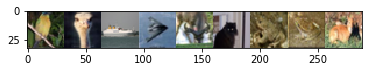

tensor([6.3464e-05, 9.9489e-05, 9.5383e-01, 4.4987e-04, 1.3741e-03, 4.2938e-02,
        6.7903e-04, 3.0416e-04, 2.6018e-04], dtype=torch.float64)


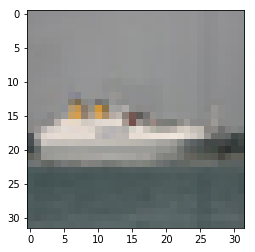

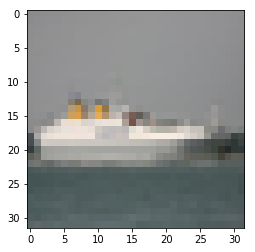

predicted ship
true ship
****************************************************************************************************


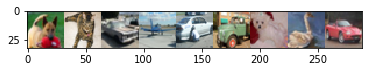

tensor([0.0010, 0.0125, 0.2773, 0.1911, 0.2878, 0.0675, 0.0114, 0.1345, 0.0170],
       dtype=torch.float64)


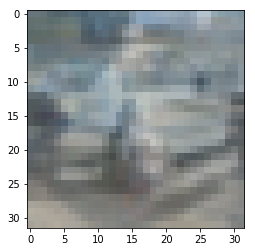

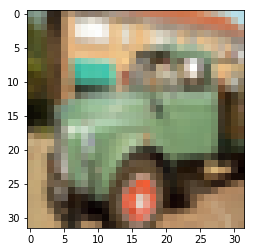

predicted truck
true truck
****************************************************************************************************


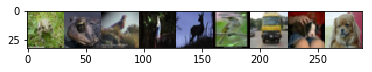

tensor([0.0147, 0.1111, 0.0758, 0.0544, 0.0180, 0.0150, 0.6631, 0.0050, 0.0429],
       dtype=torch.float64)


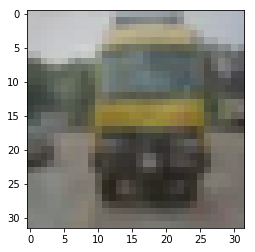

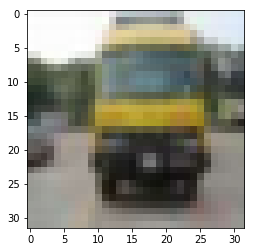

predicted truck
true truck
****************************************************************************************************


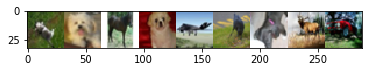

tensor([3.2181e-02, 3.6186e-04, 8.2125e-01, 6.6383e-05, 4.1233e-03, 6.0561e-03,
        9.8873e-04, 1.2641e-01, 8.5663e-03], dtype=torch.float64)


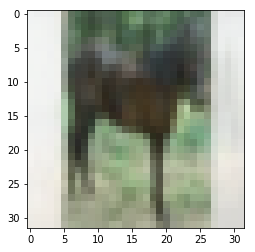

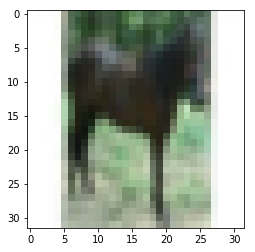

predicted horse
true horse
****************************************************************************************************


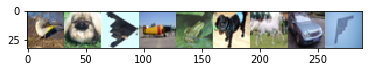

tensor([9.3403e-03, 2.1621e-02, 3.7548e-04, 2.7597e-01, 3.2125e-03, 3.4411e-02,
        6.4041e-01, 4.6863e-03, 9.9824e-03], dtype=torch.float64)


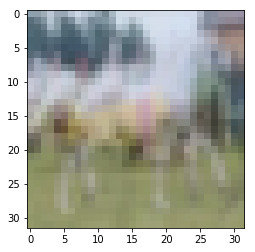

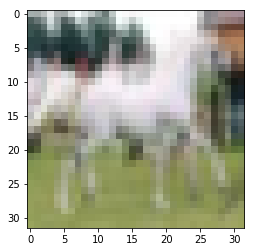

predicted horse
true horse
****************************************************************************************************


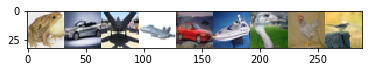

tensor([2.6547e-04, 6.9819e-04, 2.5120e-03, 6.8740e-04, 7.4837e-04, 9.9323e-01,
        3.4142e-04, 2.2174e-04, 1.2944e-03], dtype=torch.float64)


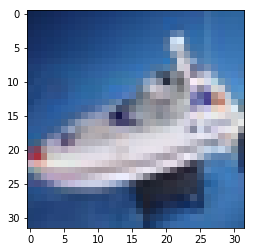

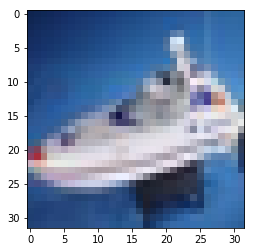

predicted ship
true ship
****************************************************************************************************


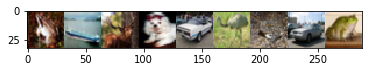

tensor([1.2782e-04, 9.3834e-01, 3.1193e-02, 8.9693e-04, 1.2602e-03, 2.1048e-03,
        3.5067e-03, 2.1875e-02, 6.9746e-04], dtype=torch.float64)


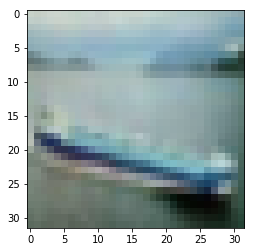

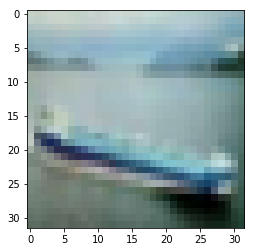

predicted ship
true ship
****************************************************************************************************


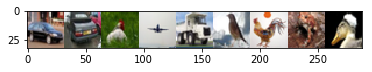

tensor([4.2928e-02, 3.7165e-02, 4.5658e-04, 1.6010e-01, 4.9278e-01, 2.5081e-01,
        1.4421e-02, 1.1959e-03, 1.3543e-04], dtype=torch.float64)


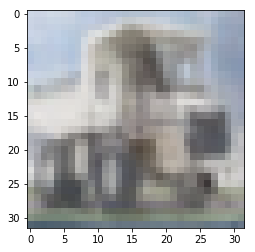

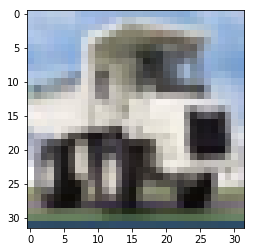

predicted truck
true truck
****************************************************************************************************


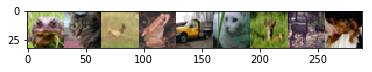

tensor([0.0345, 0.0257, 0.0061, 0.0011, 0.8219, 0.0075, 0.0409, 0.0476, 0.0147],
       dtype=torch.float64)


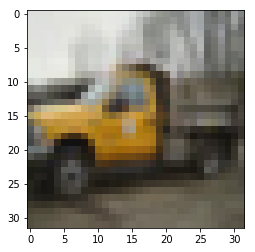

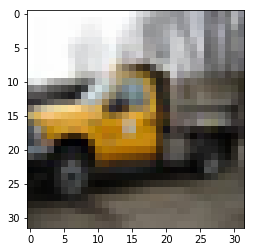

predicted truck
true truck
****************************************************************************************************


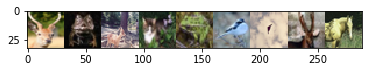

tensor([1.7745e-05, 1.5824e-02, 5.3690e-02, 1.3383e-02, 1.1344e-02, 2.2126e-01,
        1.5763e-02, 5.3741e-02, 6.1497e-01], dtype=torch.float64)


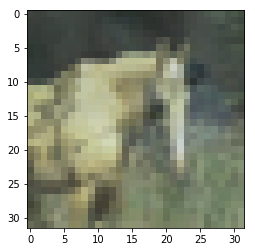

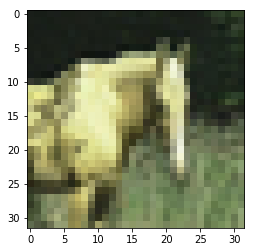

predicted horse
true horse
****************************************************************************************************


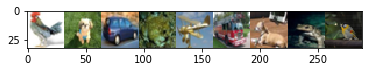

tensor([1.1982e-03, 4.3594e-02, 2.6720e-03, 8.0492e-04, 6.1172e-02, 8.7401e-01,
        1.1539e-03, 1.2866e-02, 2.5344e-03], dtype=torch.float64)


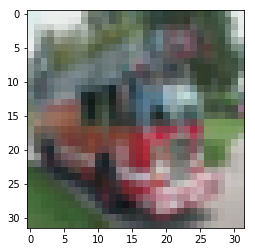

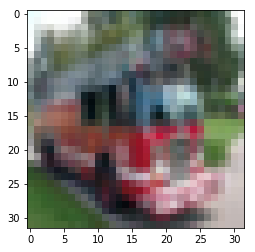

predicted truck
true truck
****************************************************************************************************


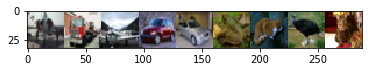

tensor([2.0884e-01, 7.1750e-01, 1.2581e-02, 8.2087e-04, 3.4524e-04, 8.1739e-04,
        5.8211e-02, 2.5126e-04, 6.3406e-04], dtype=torch.float64)


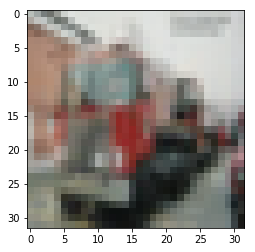

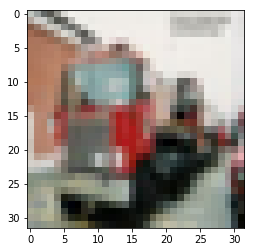

predicted truck
true truck
****************************************************************************************************


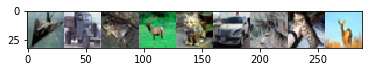

tensor([4.3143e-03, 8.8799e-01, 1.7754e-04, 3.8637e-04, 2.6069e-03, 1.0863e-03,
        1.0159e-01, 1.6087e-03, 2.3879e-04], dtype=torch.float64)


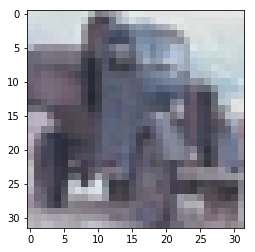

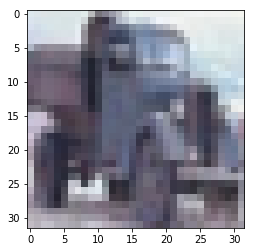

predicted truck
true truck
****************************************************************************************************


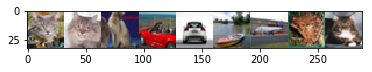

tensor([0.0036, 0.2865, 0.0017, 0.0100, 0.0121, 0.2817, 0.2871, 0.0048, 0.1125],
       dtype=torch.float64)


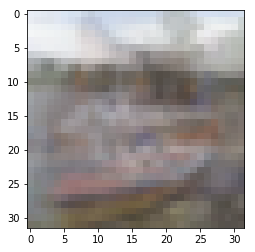

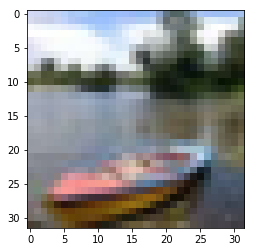

predicted ship
true ship
****************************************************************************************************


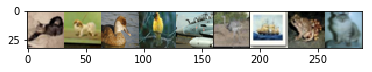

tensor([0.0039, 0.0051, 0.0076, 0.0421, 0.1402, 0.0120, 0.7669, 0.0012, 0.0211],
       dtype=torch.float64)


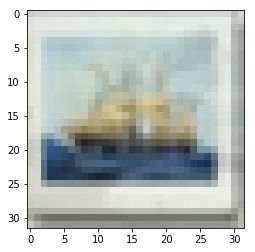

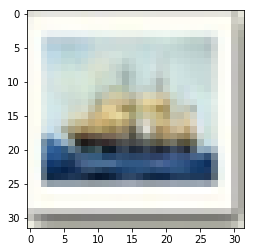

predicted ship
true ship
****************************************************************************************************


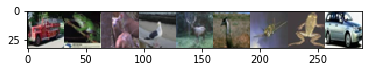

tensor([0.1372, 0.0279, 0.4006, 0.0486, 0.0574, 0.1808, 0.0328, 0.0315, 0.0832],
       dtype=torch.float64)


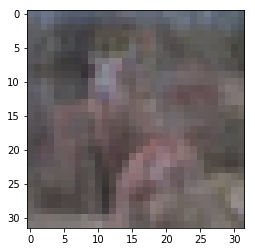

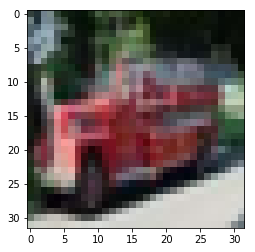

predicted horse
true truck
****************************************************************************************************


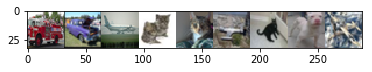

tensor([8.3863e-01, 1.2895e-02, 2.4737e-02, 8.0220e-03, 1.4752e-02, 1.8394e-02,
        9.9948e-05, 4.3667e-02, 3.8800e-02], dtype=torch.float64)


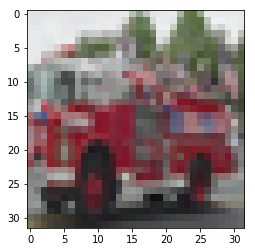

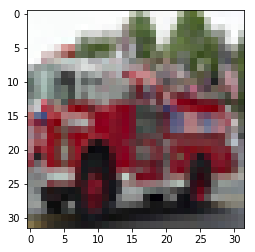

predicted truck
true truck
****************************************************************************************************


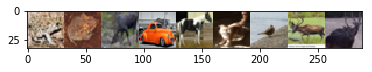

tensor([0.0014, 0.0066, 0.4879, 0.1156, 0.0468, 0.0031, 0.0257, 0.0174, 0.2954],
       dtype=torch.float64)


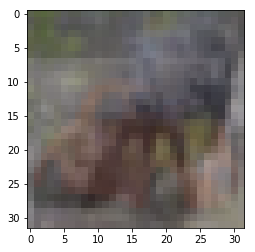

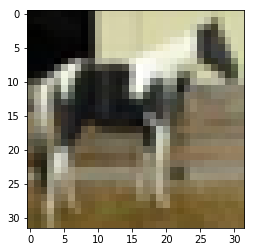

predicted horse
true horse
****************************************************************************************************


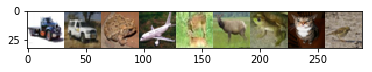

tensor([0.0082, 0.1756, 0.0200, 0.0481, 0.0084, 0.3460, 0.0126, 0.0045, 0.3766],
       dtype=torch.float64)


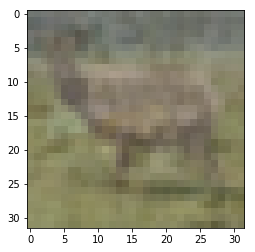

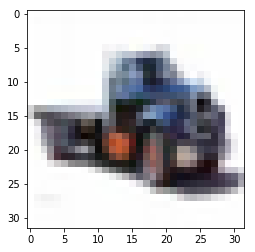

predicted horse
true truck
****************************************************************************************************


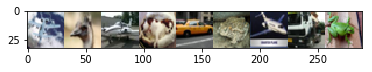

tensor([0.0791, 0.0028, 0.0774, 0.0780, 0.0083, 0.0203, 0.0635, 0.6667, 0.0037],
       dtype=torch.float64)


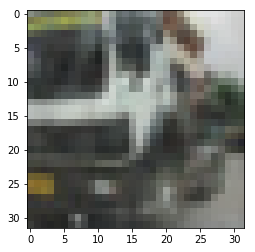

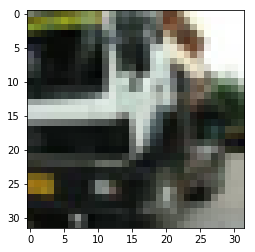

predicted truck
true truck
****************************************************************************************************


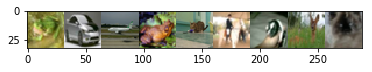

tensor([4.9469e-05, 7.0224e-01, 5.9555e-02, 3.6574e-04, 1.4518e-01, 4.1411e-02,
        3.3090e-03, 4.4966e-02, 2.9215e-03], dtype=torch.float64)


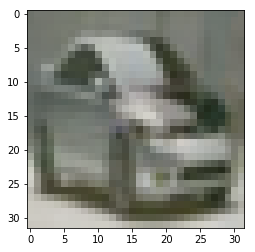

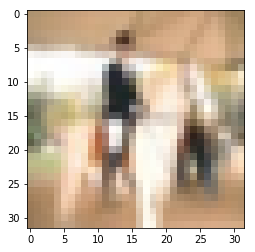

predicted ship
true horse
****************************************************************************************************


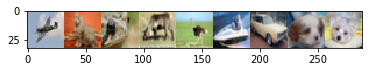

tensor([2.6281e-05, 1.3356e-04, 7.8418e-04, 4.2961e-04, 7.3249e-05, 9.9793e-01,
        8.1559e-05, 4.4621e-04, 9.8245e-05], dtype=torch.float64)


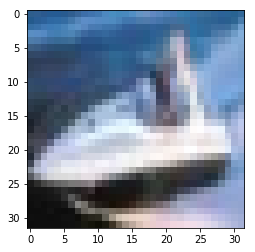

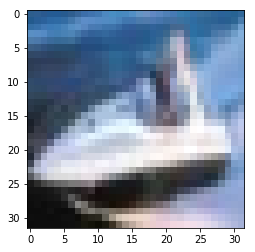

predicted ship
true ship
Accuracy of the network on the 10000 test images: 85 %
total correct 8531
total test set images 10000


In [60]:
correct = 0
total = 0
flag =1
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    outputs, alphas, avg_images = fore_net(inputs)
    _, predicted = torch.max(outputs.data, 1)


    if flag==1 :
      for j in range (50):
        print("*"*100)
        img1 = torch.cat((inputs[j][0], inputs[j][1], inputs[j][2], inputs[j][3], inputs[j][4], inputs[j][5], inputs[j][6], inputs[j][7], inputs[j][8]) , 2)
        display(img1)

        print(alphas[j])

        img2 = avg_images[j]
        display(img2)

        img3 = inputs[j][fore_idx_test[j]]
        display(img3)

        print("predicted", classes[predicted[j]+7])
        print("true", classes[labels[j]+7])

      flag =0


    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
print("total correct", correct)
print("total test set images", total)